#Importing Environments

In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

Input Data: 

In [2]:
data=pd.read_csv("/Users/sripradharavi/Documents/NYC.csv")

In [3]:
data.head()

,Agency,Platform,Url,Date Sampled,Likes/Followers/Visits/Downloads
0,OEM,SMS,NaN,02/17/2012 12:00:00 AM,61652.0
1,OEM,SMS,NaN,11/09/12 0:00,44547.0
2,EDC,Flickr,http://www.flickr.com/nycedc,05/09/12 0:00,NaN
3,NYCHA,Newsletter,NaN,05/09/12 0:00,NaN
4,DHS,Twitter,www.twitter.com/nycdhs,06/13/2012 12:00:00 AM,389.0


Data Cleansing and Featuring: 

In [4]:
Date=pd.to_datetime(data['Date Sampled'])
#data['month']=data['Date'].dt.month
data['year']=Date.dt.year
data['day']=Date.dt.day
data['date']=Date.dt.date
data['day name']=Date.dt.weekday_name
d=data['date'][0:9]

In [5]:
d

0    2012-02-17
1    2012-11-09
2    2012-05-09
3    2012-05-09
4    2012-06-13
5    2012-08-02
6    2011-08-08
7    2011-08-08
8    2011-08-08
Name: date, dtype: object

Assigning Month names

In [6]:
data["month name"]=Date.dt.month.apply(lambda x: calendar.month_name[x])

Visualising the Average Engagement vs Month

[<matplotlib.text.Text at 0x1146d7c18>, <matplotlib.text.Text at 0x114695d30>]

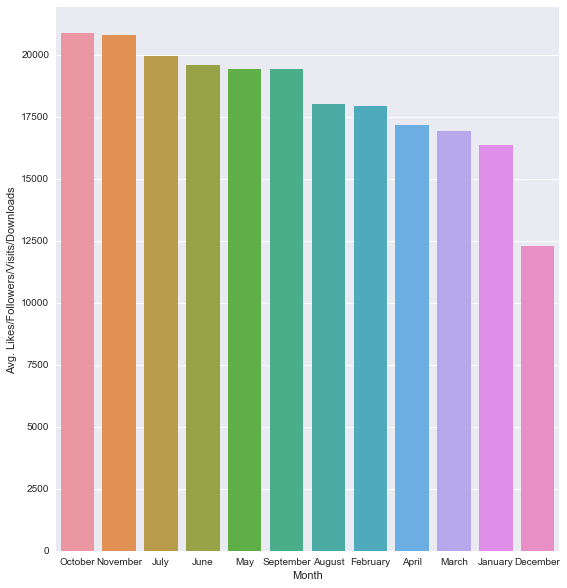

In [7]:
fig,(ax1)=plt.subplots(nrows=1)
fig.set_size_inches(9,10)
monthAgg=pd.DataFrame(data.groupby("month name")["Likes/Followers/Visits/Downloads"].mean()).reset_index()
monthSorted=monthAgg.sort_values(by="Likes/Followers/Visits/Downloads",ascending=False)
sn.barplot(data=monthSorted,x="month name",y="Likes/Followers/Visits/Downloads",ax=ax1)
ax1.set(xlabel='Month',ylabel='Avg. Likes/Followers/Visits/Downloads ')

Visualising Average Engagement vs Platform

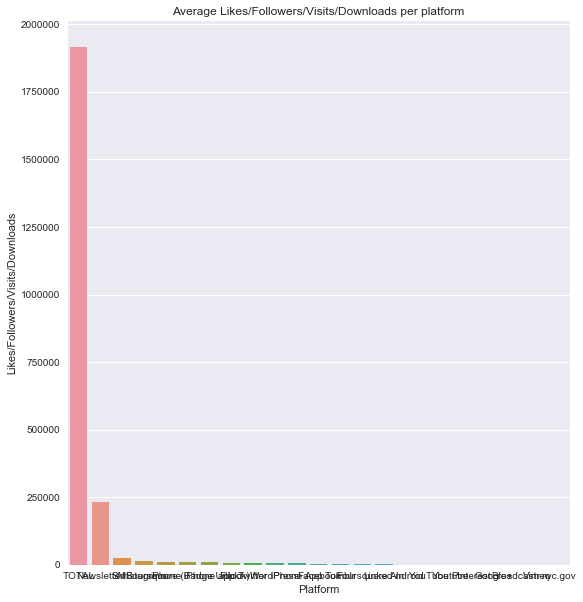

In [8]:
fig,(ax2)=plt.subplots(nrows=1)
fig.set_size_inches(9,10)
platformAgg=pd.DataFrame(data.groupby("Platform")["Likes/Followers/Visits/Downloads"].mean()).reset_index()
platformSorted=platformAgg.sort_values(by="Likes/Followers/Visits/Downloads",ascending=False)
sn.barplot(data=platformSorted,x="Platform",y="Likes/Followers/Visits/Downloads", ax=ax2)
ax2.set(xlabel="Platform", ylabel="Likes/Followers/Visits/Downloads", Title="Average Likes/Followers/Visits/Downloads per platform")

Managing Missing Values in dataset for calculating Skewness in Distribution

In [9]:
data["Likes/Followers/Visits/Downloads"]=data["Likes/Followers/Visits/Downloads"].fillna(0)

/Users/sripradharavi/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


((array([-3.67808552, -3.4453121 , -3.31714627, ...,  3.31714627,
          3.4453121 ,  3.67808552]),
  array([       0.,        0.,        0., ...,  2605149.,  2746218.,
          2785806.])),
 (31789.100034289189, 12469.005255127988, 0.26921679999775605))

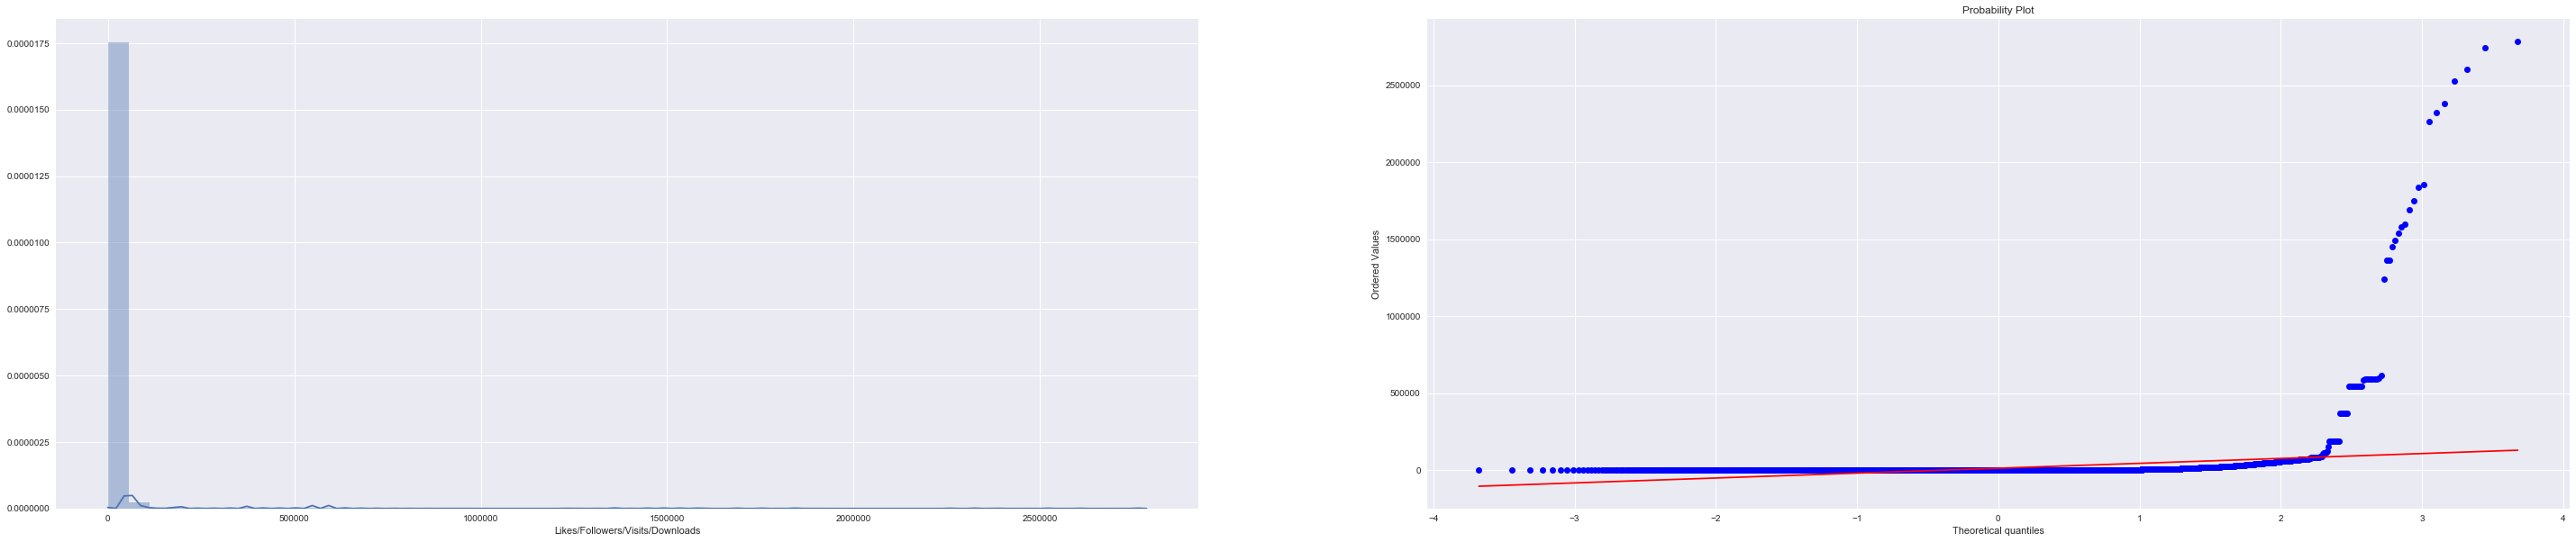

In [10]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(50, 10)
sn.distplot(data["Likes/Followers/Visits/Downloads"], ax=ax1)
stats.probplot(data["Likes/Followers/Visits/Downloads"],
               dist='norm',fit=True,plot=ax2)

In [11]:
data.head()

,Agency,Platform,Url,Date Sampled,Likes/Followers/Visits/Downloads,year,day,date,day name,month name
0,OEM,SMS,NaN,02/17/2012 12:00:00 AM,61652.0,2012,17,2012-02-17,Friday,February
1,OEM,SMS,NaN,11/09/12 0:00,44547.0,2012,9,2012-11-09,Friday,November
2,EDC,Flickr,http://www.flickr.com/nycedc,05/09/12 0:00,0.0,2012,9,2012-05-09,Wednesday,May
3,NYCHA,Newsletter,NaN,05/09/12 0:00,0.0,2012,9,2012-05-09,Wednesday,May
4,DHS,Twitter,www.twitter.com/nycdhs,06/13/2012 12:00:00 AM,389.0,2012,13,2012-06-13,Wednesday,June


Visualizing outlisers in data

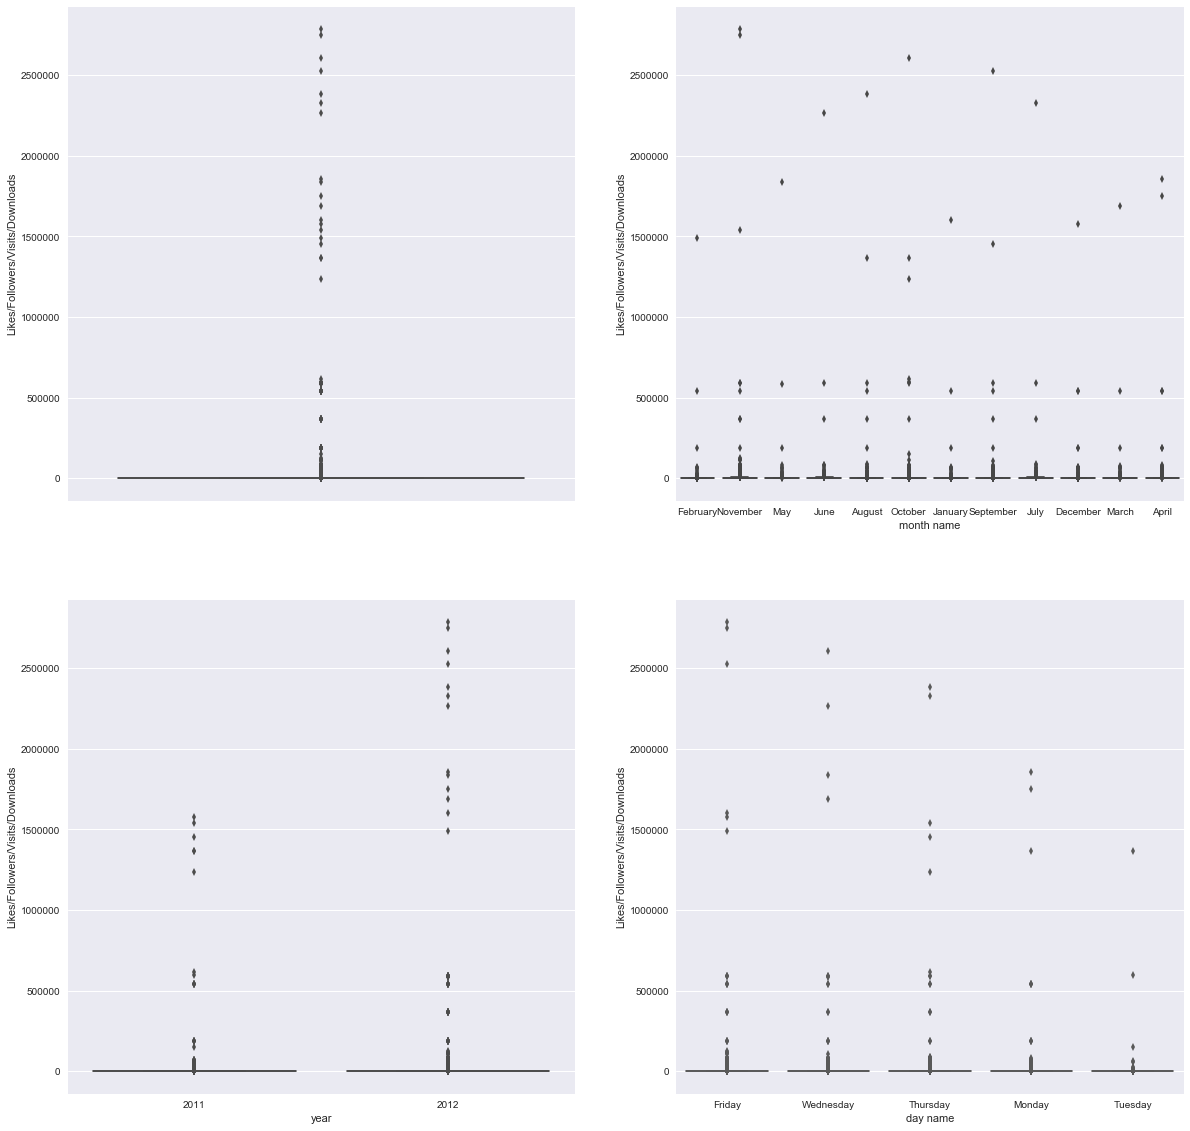

In [12]:
fig, axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,20)
sn.boxplot(data=data, y="Likes/Followers/Visits/Downloads", orient="v", ax=axes[0][0])
sn.boxplot(data=data, y="Likes/Followers/Visits/Downloads", x="month name",ax=axes[0][1])
sn.boxplot(data=data, y="Likes/Followers/Visits/Downloads", x="year", ax=axes[1][0])
sn.boxplot(data=data,palette="Set2", y="Likes/Followers/Visits/Downloads", x="day name", ax=axes[1][1])


Correlation between Engagement and Features

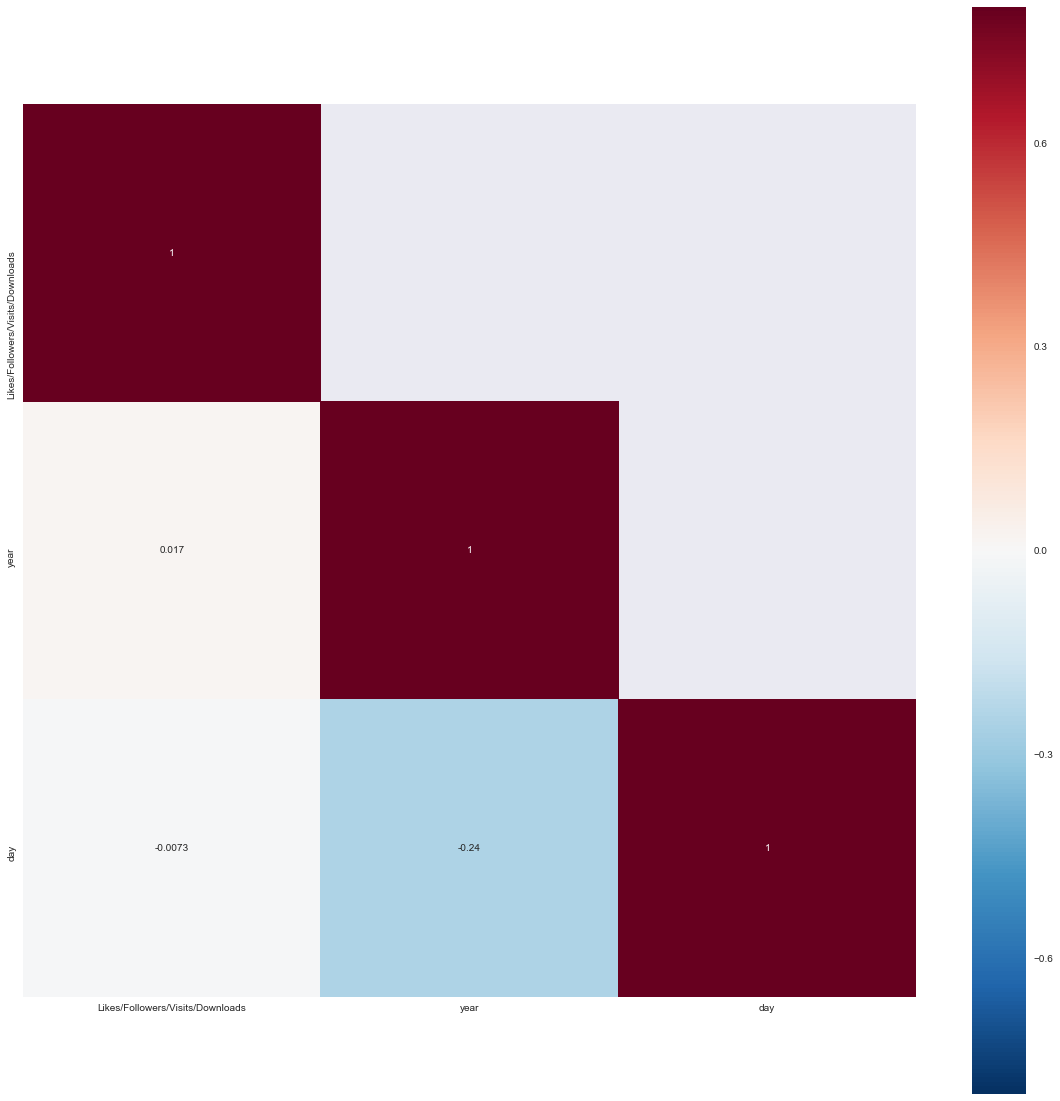

In [13]:
corr=data.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sn.heatmap(corr,mask=mask, vmax=0.8, square=True,annot=True)